<a href="https://colab.research.google.com/github/BENDER1A4/DIGITAL_SIGNAL_PROCESSING_UNAL/blob/main/SAMPLING_FREQUENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAMPLING_FREQUENCY

In this code a sinusoidal signal is graphed with two sampling frequencies (50Hz & 200Hz)

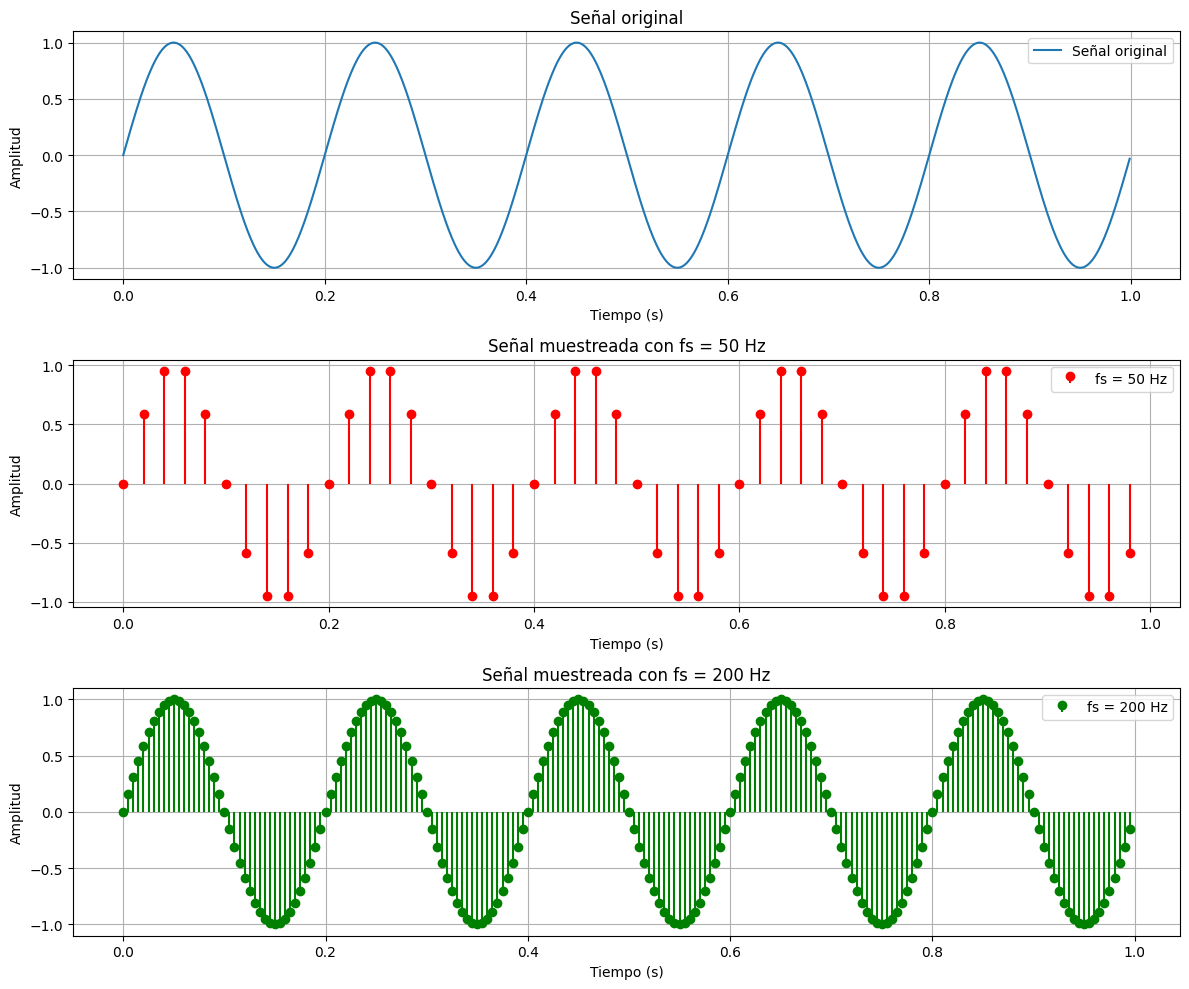

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parámetros de la señal original
fs_original = 1000  # Frecuencia de muestreo original en Hz
t_max = 1         # Duración de la señal en segundos
f_signal = 5      # Frecuencia de la señal en Hz

# Generación de la señal original
t_original = np.linspace(0, t_max, int(fs_original * t_max), endpoint=False)
signal = np.sin(2 * np.pi * f_signal * t_original)

# Definición de dos frecuencias de muestreo diferentes
fs_1 = 50   # Frecuencia de muestreo 1 en Hz
fs_2 = 200  # Frecuencia de muestreo 2 en Hz

# Muestreo de la señal
t_sampled_1 = np.linspace(0, t_max, int(fs_1 * t_max), endpoint=False)
t_sampled_2 = np.linspace(0, t_max, int(fs_2 * t_max), endpoint=False)

signal_sampled_1 = np.sin(2 * np.pi * f_signal * t_sampled_1)
signal_sampled_2 = np.sin(2 * np.pi * f_signal * t_sampled_2)

# Graficar las señales en tiempo
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t_original, signal, label="Señal original")
plt.title("Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.stem(t_sampled_1, signal_sampled_1, basefmt=" ", linefmt="r-", markerfmt="ro", label=f"fs = {fs_1} Hz")
plt.title(f"Señal muestreada con fs = {fs_1} Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.stem(t_sampled_2, signal_sampled_2, basefmt=" ", linefmt="g-", markerfmt="go", label=f"fs = {fs_2} Hz")
plt.title(f"Señal muestreada con fs = {fs_2} Hz")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



Choosing the appropriate sampling frequency is a balance between preserving signal fidelity and optimizing resources. An adequate sampling frequency (as in the second case) captures the necessary details of the original signal, while a very low frequency may result in the loss of critical information or aliasing.

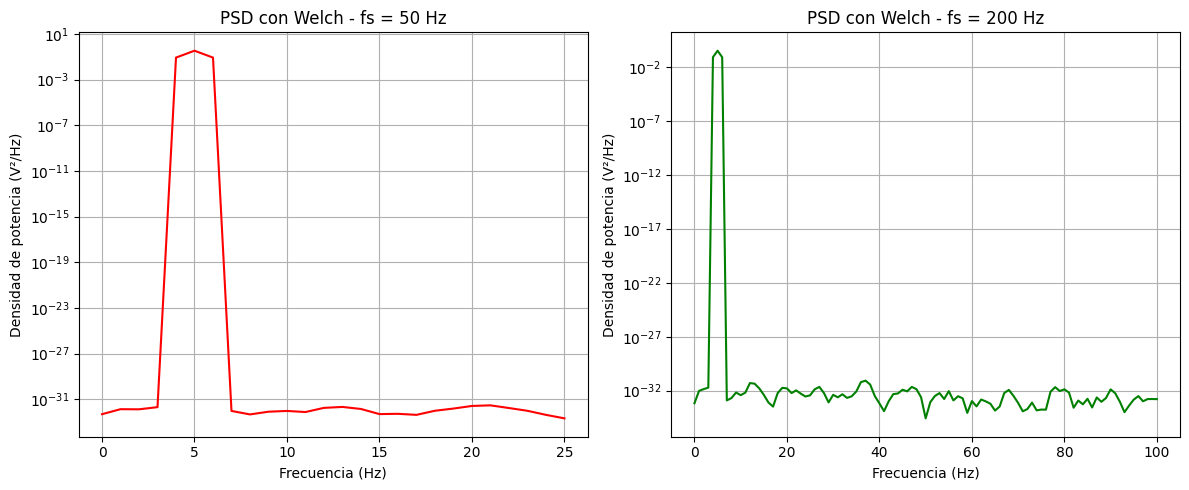

In [2]:
# Cálculo de la PSD usando el método de Welch
# Para obtener una buena estimación usamos el tamaño del segmento igual al largo de la señal
f_welch1, psd1 = welch(signal_sampled_1, fs=fs_1, nperseg=len(signal_sampled_1))
f_welch2, psd2 = welch(signal_sampled_2, fs=fs_2, nperseg=len(signal_sampled_2))

# Graficar el PSD de cada señal muestreada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(f_welch1, psd1, 'r-')
plt.title(f"PSD con Welch - fs = {fs_1} Hz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de potencia (V²/Hz)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(f_welch2, psd2, 'g-')
plt.title(f"PSD con Welch - fs = {fs_2} Hz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de potencia (V²/Hz)")
plt.grid(True)

plt.tight_layout()
plt.show()
